In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/diabetes.csv')


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
feature_names=X.columns

In [ ]:
df = pd.DataFrame(X, columns=feature_names)


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


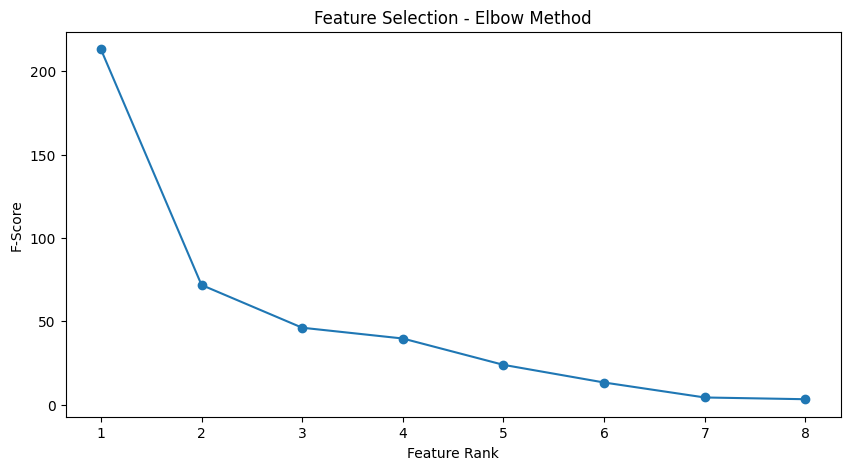

In [ ]:
X=X_scaled

import matplotlib.pyplot as plt

F_statistic, p_values = f_classif(X, y)

# Create a DataFrame for visualization
df_anova = pd.DataFrame({'Feature': feature_names, 'ANOVA F-score': F_statistic, 'p-value': p_values})
df_anova = df_anova.sort_values('ANOVA F-score', ascending=False)


selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)


# Plot F-scores to find the "elbow"
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(df_anova) + 1), df_anova['ANOVA F-score'], marker='o', linestyle='-')
plt.xlabel("Feature Rank")
plt.ylabel("F-Score")
plt.title("Feature Selection - Elbow Method")
plt.show()




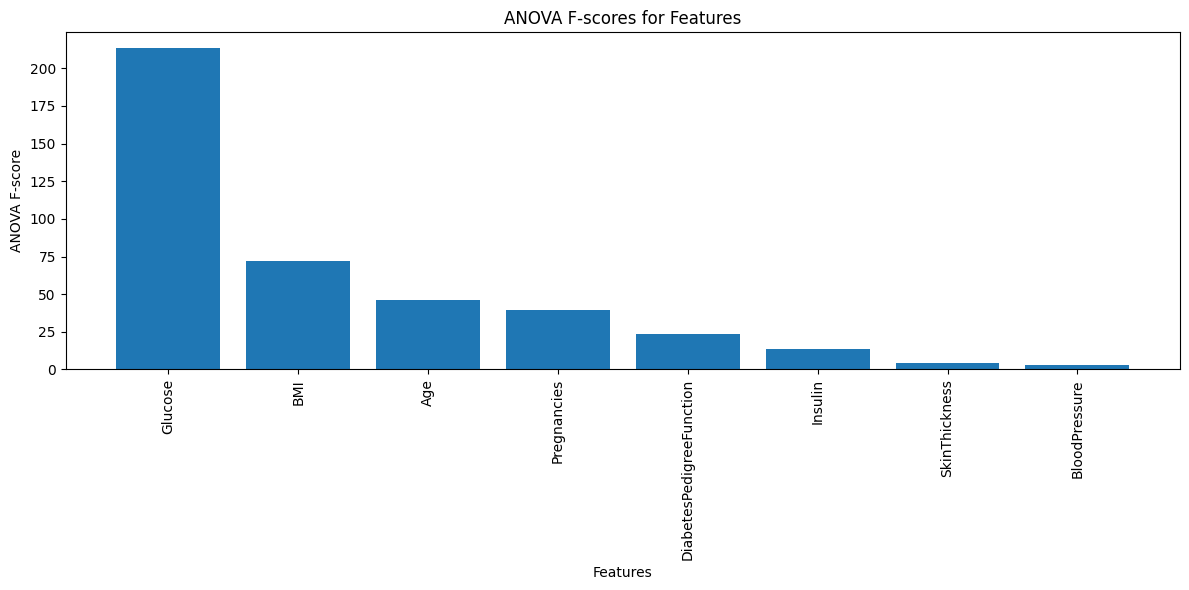

In [ ]:
# Plot the ANOVA F-scores
plt.figure(figsize=(12, 6))
plt.bar(df_anova['Feature'], df_anova['ANOVA F-score'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('ANOVA F-score')
plt.title('ANOVA F-scores for Features')
plt.tight_layout()
plt.show()


In [ ]:
# Method 1: SelectKBest (Choosing top 6 features)
k = 6
selector_kbest = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector_kbest.fit_transform(X, y)
selected_features_kbest = feature_names[selector_kbest.get_support()]
print("\nSelectKBest Selected Features:", selected_features_kbest)

# Display reduced datasets' shapes
print("\nOriginal Dataset Shape:", X.shape)
print("SelectKBest Reduced Shape:", X_kbest.shape)


SelectKBest Selected Features: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')

Original Dataset Shape: (768, 8)
SelectKBest Reduced Shape: (768, 6)


In [ ]:
# Method 2: SelectPercentile
percentile = 75
selector_percentile = SelectPercentile(score_func=f_classif, percentile=percentile)
X_percentile = selector_percentile.fit_transform(X, y)
selected_features_percentile = feature_names[selector_percentile.get_support()]
print("\nSelectPercentile Selected Features:", selected_features_percentile)

print("SelectPercentile Reduced Shape:", X_percentile.shape)


SelectPercentile Selected Features: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')
SelectPercentile Reduced Shape: (768, 6)


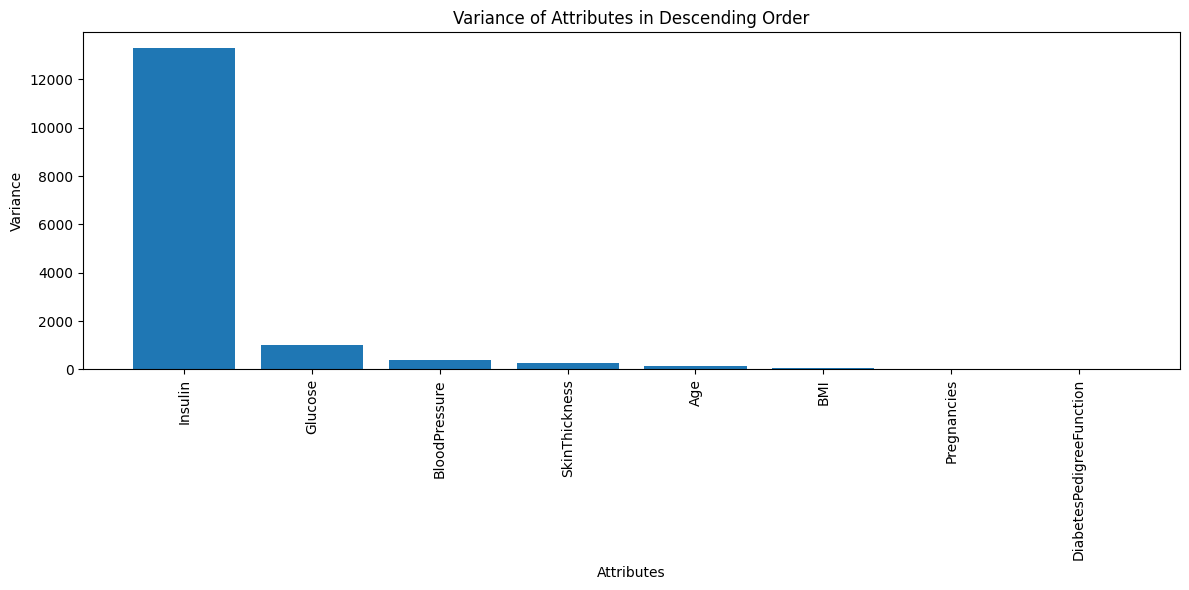

In [ ]:
variances = df.var().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(variances.index, variances.values)
plt.xticks(rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Variance')
plt.title('Variance of Attributes in Descending Order')
plt.tight_layout()
plt.show()

In [ ]:
# Method 3: PCA
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("\nPCA Explained Variance Ratio:", explained_variance)

print("PCA Reduced Shape:", X_pca.shape)


PCA Explained Variance Ratio: [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305]
PCA Reduced Shape: (768, 5)


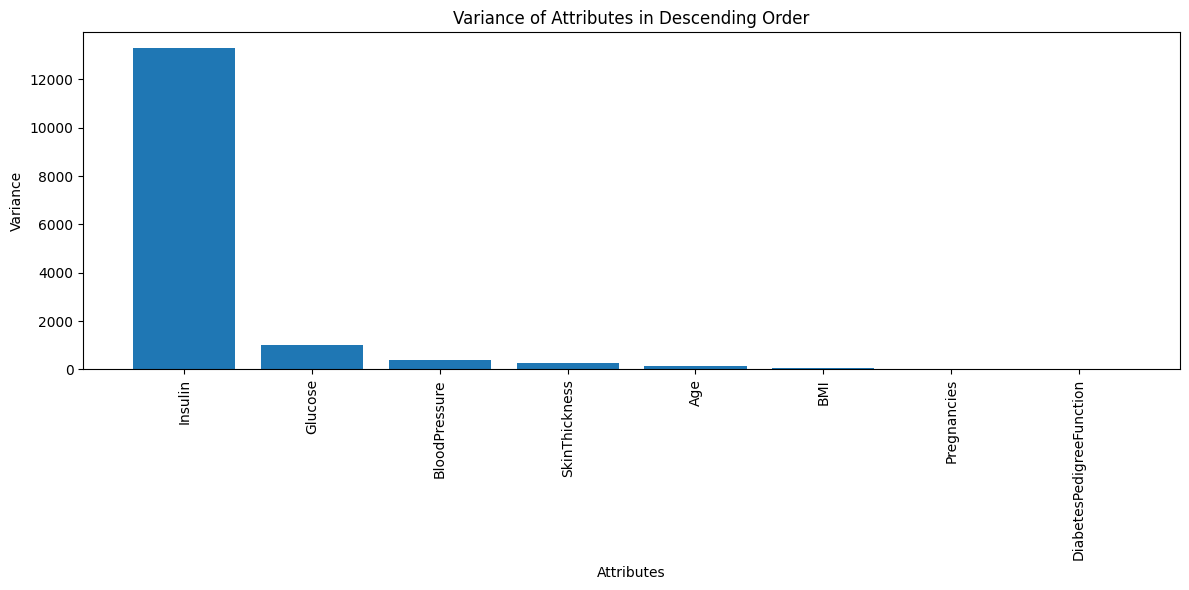

Selected Variance Threshold: 196.38814560924658


In [ ]:
variances = df.var().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(variances.index, variances.values)
plt.xticks(rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Variance')
plt.title('Variance of Attributes in Descending Order')
plt.tight_layout()
plt.show()

# Determine a reasonable threshold - for example, below the median variance
threshold = np.median(variances)
print("Selected Variance Threshold:", threshold)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv('/content/diabetes.csv')
X=df.drop('Outcome',axis=1)
df = pd.DataFrame(X, columns=feature_names)

selector = VarianceThreshold(threshold=threshold)
X_selected = selector.fit_transform(X)

In [ ]:
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))
print("Reduced Feature Shape:", X_selected.shape)

Selected Features: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
Reduced Feature Shape: (768, 4)
